In [1]:
#!pip install matplotlib
#!pip install numpy
#!pip install seaborn

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data Cleaning
Here, we remove the notes and citations at the bottom of the data

In [3]:
clean = False

In [4]:
if clean:
    files = os.listdir('raw_data/mortality')
    for file in files:
        with open('raw_data/mortality/' + file, 'r+') as f:
            a = f.read()

        split_ = a.split('"---"')
        print(file, a.count('"---"'))
        with open('data/mortality/' + file, 'w+') as f:
            f.write(split_[0])

Then, we can read from each txt/csv file and concatenate the DataFrames after reading them using the Pandas library.

In [5]:
combine_files = False

In [6]:
if combine_files:
    files = os.listdir('data/mortality')
    # with open('data/mortality/master.txt', 'w+') as f:
    with open('data/mortality/Alabama.txt', 'r') as g:
    #         f.write(g.read())
        df = pd.read_csv('data/mortality/Alabama.txt', sep='\t', lineterminator='\r', encoding = "utf-8")
    for file in files[1:]:
        if file == 'combined':
            continue
    #     with open('data/mortality/' + file, 'r') as h:
    #             f.writelines(h.readlines()[1:])
        print(file)
        next_df = pd.read_csv('data/mortality/' + file, sep='\t', lineterminator='\r', encoding = 'ISO-8859-1')
        df = pd.concat([df, next_df])
    df.to_csv('data/mortality/combined/master.csv', mode='w', sep='\t', encoding='utf-8')

We can test if the combined csv works here.

In [26]:
df = pd.read_csv('data/mortality/combined/master.csv', sep='\t', engine='python', encoding='utf-8')

Let's describe df and see how many deaths are recorded in this dataset.

In [8]:
df.describe()

,Unnamed: 0,Deaths,Population,State Code,Year,Year Code
count,299307.000000,299256.000000,2.992560e+05,299256.000000,299256.000000,299256.000000
mean,3876.925889,151.719468,9.465143e+06,28.637802,2008.179515,2008.179515
std,3065.841566,599.703516,8.814195e+06,15.519940,5.516246,5.516246
min,0.000000,10.000000,4.917800e+05,1.000000,1999.000000,1999.000000
25%,1467.000000,15.000000,3.670883e+06,16.000000,2003.000000,2003.000000
50%,3185.000000,29.000000,6.332669e+06,28.000000,2008.000000,2008.000000
75%,5527.000000,86.000000,1.226380e+07,42.000000,2013.000000,2013.000000
max,15890.000000,27659.000000,3.953665e+07,56.000000,2017.000000,2017.000000


In [27]:
df = df.dropna()
df['Deaths'] = df['Deaths'].astype(int)
df = df.sort_values(by='Deaths', ascending=False)

In [29]:
df['State'].value_counts()

California              15890
Texas                   13621
Florida                 12910
New York                11790
Pennsylvania            10839
Ohio                    10408
Illinois                10190
Michigan                 9218
North Carolina           8901
Georgia                  8422
New Jersey               7839
Virginia                 7575
Tennessee                7560
Indiana                  7251
Washington               7232
Missouri                 7009
Massachusetts            6706
Wisconsin                6635
Arizona                  6473
Maryland                 6303
South Carolina           6262
Alabama                  6222
Minnesota                6186
Kentucky                 5787
Louisiana                5734
Colorado                 5541
Oregon                   5531
Oklahoma                 5103
Iowa                     4815
Mississippi              4769
Connecticut              4746
Arkansas                 4631
Kansas                   4443
West Virgi

In [11]:
# TODO: Get the max underlying cause of death for each state

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299256 entries, 191904 to 149575
Data columns (total 11 columns):
Unnamed: 0                        299256 non-null int64
Crude Rate                        299256 non-null object
Deaths                            299256 non-null int64
Notes                             299256 non-null object
Population                        299256 non-null float64
State                             299256 non-null object
State Code                        299256 non-null float64
Underlying Cause of death         299256 non-null object
Underlying Cause of death Code    299256 non-null object
Year                              299256 non-null float64
Year Code                         299256 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 27.4+ MB


In [30]:
df['Underlying Cause of death'] = df['Underlying Cause of death'].astype(object).apply(lambda x: x.strip())

In [31]:
year_state_causes_df = df.groupby(['Year', 'State'])['Underlying Cause of death', 'Deaths'].max().reset_index()
years = year_state_causes_df['Year'].unique()

2006.0
2007.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


2008.0
2009.0


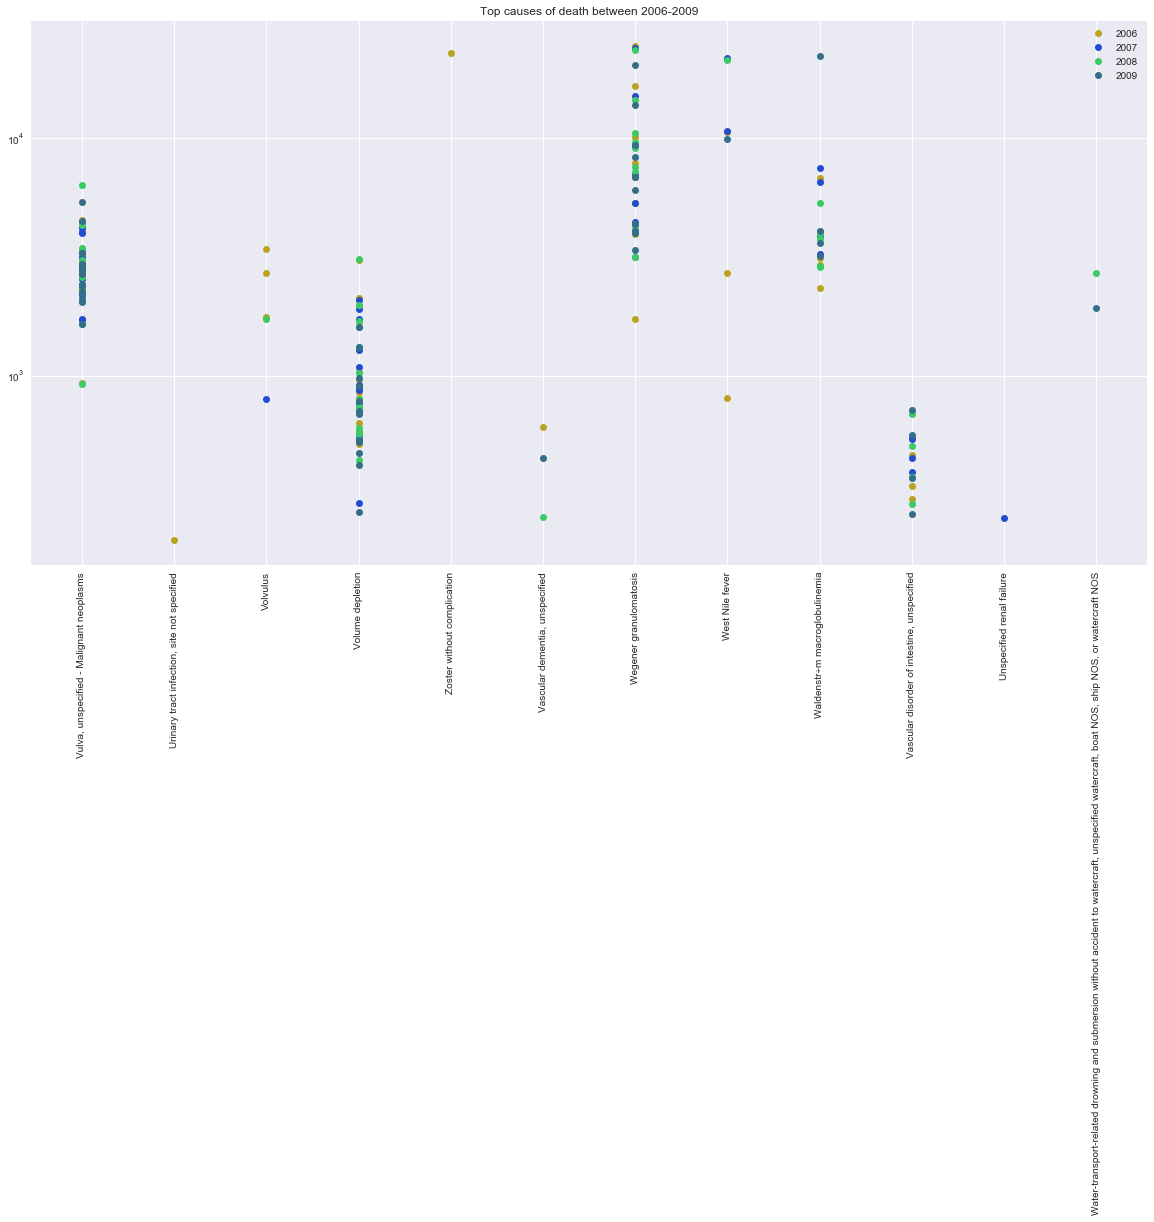

In [68]:
first_recession_years = [2000.0, 2001.0, 2002.0]
second_recession_years = [2006.0, 2007.0, 2008.0, 2009.0]
plt.figure(figsize=(20,10))
plt.title('Top causes of death between 2006-2009')
plt.xticks(rotation=90)
plt.yscale('log')
for year in second_recession_years:
    print(year)
    states = year_state_causes_df.loc[year_state_causes_df['Year']==year]['State']
#     labels=[]
    x = []
    y = []
    for state in states:
#         print(state)
        result = year_state_causes_df.loc[year_state_causes_df['Year']==year][year_state_causes_df['State']==state]
#         print(result['Underlying Cause of death'].values[0], result['Deaths'].values[0])
        x.append(result['Underlying Cause of death'].values[0])
        y.append(result['Deaths'].values[0])
#         labels.append(state)
    plt.plot(x, y, marker='o', c=np.random.rand(3,), linestyle='none', label=str(int(year)))
    
#     plt.plot(x, y, marker='o', linestyle='none') #, labels=labels)
plt.legend()
plt.show()

We should convert the year column to an integer value as a float type doesn't make sense.

In [ ]:
df['Year'] = df['Year'].astype(int)

In [ ]:
df['Deaths'].groupby(df['Year']).sum().sort_values(ascending=False)

In [ ]:
# Plot the number of deaths from above (different line for each cause, x axis year, y axis deaths)
# Vertical lines sections highlighted around the recessions in the background
